In [27]:
import lmstudio as lms

#model = lms.llm("llama-3.2-1b-instruct")

model = lms.llm("llama-3.3-70b-instruct")

In [28]:
result = model.respond("Who are you?")

print(result)

I'm an artificial intelligence model known as Llama. Llama stands for "Large Language Model Meta AI."


In [10]:
c1 = "Japan"
c2 = "China"

system_msg = 'You are a political scientist with expert knowledge on international relations. You will be asked about bilateral relations between two countries. Please answer on a scale from 0 to 9 where 0 means "very bad relation" and 9 means "very positive relation".  Please answer only with a single number from 0 to 9.'

user_msg = f"""How would you rate the relation between {c1} and {c2}?"""

#messages = [{"role": "system", "content": system_msg},
#            {"role": "user", "content": user_msg}]

chat = lms.Chat()
chat.add_system_prompt(system_msg)
chat.add_user_message(user_msg)
result = model.respond(chat)

print(result)


8


In [29]:
num_samples = 10
ratings = []
for sample in range(num_samples):
    #print(sample)
    chat = lms.Chat()
    chat.add_system_prompt(system_msg)
    chat.add_user_message(user_msg)
    result = model.respond(chat)
    ratings.append(float(result.content))
    print(result)



4
4
4
4
4
4
4
4
4
4


In [23]:
#(result.content)

'3'

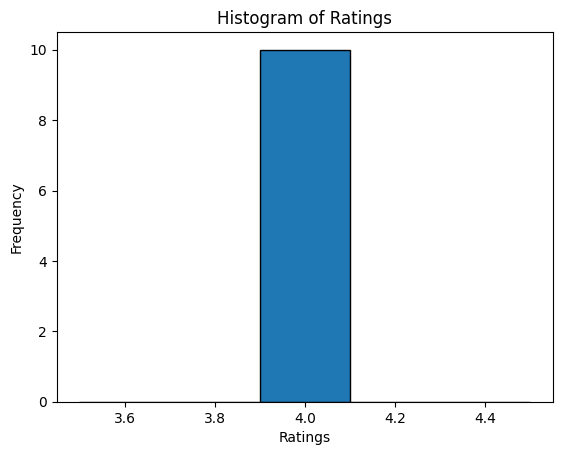

In [30]:
import matplotlib.pyplot as plt


# Plot the histogram
plt.hist(ratings, bins=5, edgecolor="black")

# Labels and title
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title("Histogram of Ratings")

# Show the plot
plt.show()


In [32]:
import numpy as np
countries=[
    'United States',
    'China',
    'Russia',
    'India',
    'Germany',
    'United Kingdom',
    'France',
    'Japan',
    'Brazil',
    'South Korea']



In [34]:
numC = len(countries)
IRmatrix = np.zeros((numC, numC))
IRlist = []

system_msg = 'You are a political scientist with expert knowledge on international relations. You will be asked about bilateral relations between two countries. Please answer on a scale from 0 to 9 where 0 means "very bad relation" and 9 means "very positive relation". Please answer only with a single number from 0 to 9.'

for c1x,c1 in enumerate(countries):
    for c2x,c2 in enumerate(countries):
        #if c2x > c1x:   
        user_msg = f"""How would you rate the relation between {c1} and {c2}?"""

        chat = lms.Chat()
        chat.add_system_prompt(system_msg)
        chat.add_user_message(user_msg)
        rating = model.respond(chat)

        #IRmatrix[c1x,c2x] = rating
        #IRmatrix[c2x,c1x] = rating
        print(c1,c2,rating)
        rel = [c1,c2,float(rating.content)]
        IRlist.append(rel)


United States United States 9
United States China 4
United States Russia 2
United States India 8
United States Germany 8
United States United Kingdom 8
United States France 8
United States Japan 8
United States Brazil 7
United States South Korea 8
China United States 4
China China 9
China Russia 8
China India 4
China Germany 7
China United Kingdom 5
China France 7
China Japan 4
China Brazil 8
China South Korea 6
Russia United States 2
Russia China 8
Russia Russia 9
Russia India 8
Russia Germany 4
Russia United Kingdom 2
Russia France 4
Russia Japan 4
Russia Brazil 6
Russia South Korea 5
India United States 8
India China 4
India Russia 8
India India 9
India Germany 8
India United Kingdom 7
India France 8
India Japan 8
India Brazil 7
India South Korea 7
Germany United States 8
Germany China 6
Germany Russia 2
Germany India 7
Germany Germany 9
Germany United Kingdom 7
Germany France 8
Germany Japan 8
Germany Brazil 7
Germany South Korea 8
United Kingdom United States 8
United Kingdom Chin

In [22]:
IRlist[1][2].content

'4'

In [37]:
import networkx as nx
from pyvis.network import Network
graph = nx.DiGraph()
for c in countries:
    graph.add_node(c, color="grey", label=c)

for rel in IRlist:
    #print(rel)
    if rel[2] > 5:
        graph.add_edge(rel[0],rel[1], weight = rel[2])
    
    #print(rel[0],rel[1], rel[2])
#graph.edges

In [38]:
#import streamlit.components.v1 as components

net = Network(
    notebook=True,
    height="750px",
    width="100%",
    directed=True,
    bgcolor="#ffffff",
    font_color="black"
    #cdn_resources="in_line"  # Fix for Jupyter display issues
)
# Convert NetworkX graph to Pyvis graph
net.from_nx(graph)

# Show the interactive graph
net.show("interactive_graph.html")

#HtmlFile = open("interactive_graph.html", 'r', encoding='utf-8')
#source_code = HtmlFile.read()
#components.html(source_code, height=800, width=800, scrolling=True)



interactive_graph.html
